In [12]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the data from the data set 
house = pd.read_csv('C:\\Users\\renuk\\OneDrive\\Documents\\AdvanceRegressionAssignment\\train.csv')

In [3]:
house.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
house.shape

(1460, 81)

In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
house.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# Creating the Dataframe with just column name and count of missing values
null_data = pd.DataFrame({'column_name': house.columns,'missing_per' : house.isnull().sum()*100/len(house)}).reset_index(drop=True)

In [13]:
#Displaying the columns
null_data

,column_name,missing_per
0,Id,0.000000
1,MSSubClass,0.000000
2,MSZoning,0.000000
3,LotFrontage,17.739726
4,LotArea,0.000000
...,...,...
76,MoSold,0.000000
77,YrSold,0.000000
78,SaleType,0.000000
79,SaleCondition,0.000000


In [15]:
# Taking the Dataframe where missing values are more than 40%
b = null_data[null_data['missing_per'] > 40]

In [16]:
b

,column_name,missing_per
6,Alley,93.767123
57,FireplaceQu,47.260274
72,PoolQC,99.520548
73,Fence,80.753425
74,MiscFeature,96.301370


In [20]:
#checking the columns where the count of null values is greater than 0

In [22]:
house.columns[house.isnull().sum() > 0]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [ ]:
#imputing the null values according to the data dictionary

In [23]:
house['Alley'] = house['Alley'].replace(np.nan,'No alley access')

In [25]:
house['BsmtQual'] = house['BsmtQual'].replace(np.nan,'No Basement')
house['BsmtCond'] = house['BsmtCond'].replace(np.nan,'No Basement')
house['BsmtExposure'] = house['BsmtExposure'].replace(np.nan,'No Basement')
house['BsmtFinType1'] = house['BsmtFinType1'].replace(np.nan,'No Basement')
house['BsmtFinType2'] = house['BsmtFinType2'].replace(np.nan,'No Basement')
house['FireplaceQu'] = house['FireplaceQu'].replace(np.nan,'No Fireplace')
house['GarageType'] = house['GarageType'].replace(np.nan,'No Garage')
house['GarageFinish'] = house['GarageFinish'].replace(np.nan,'No Garage')
house['GarageQual'] = house['GarageQual'].replace(np.nan,'No Garage')
house['GarageCond'] = house['GarageCond'].replace(np.nan,'No Garage')
house['PoolQC'] = house['PoolQC'].replace(np.nan,'No Pool')
house['Fence'] = house['Fence'].replace(np.nan,'No Fence')
house['MiscFeature'] = house['MiscFeature'].replace(np.nan,'None')

In [ ]:
# imputing the null values with mean (numerical variable) and mode (Categorical variable)

In [33]:
house['GarageYrBlt'] = house['GarageYrBlt'].replace(np.nan,0.0)
house['LotFrontage'] = house['LotFrontage'].replace(np.nan,house['LotFrontage'].median())
house['MasVnrType'] = house['MasVnrType'].replace(np.nan,house['MasVnrType'].mode()[0])
house['MasVnrArea'] = house['MasVnrArea'].replace(np.nan,house['MasVnrArea'].median())
house['Electrical'] = house['Electrical'].replace(np.nan,house['Electrical'].mode()[0])

In [35]:
# checking the columns with null values any 
house.columns[house.isnull().sum() > 0]

Index([], dtype='object')

In [130]:
house.isnull().sum().sort_values(ascending=False).head(40)

LotFrontage                 0
BsmtQual_TA                 0
BsmtExposure_Mn             0
BsmtExposure_Gd             0
BsmtCond_TA                 0
BsmtCond_Po                 0
BsmtCond_No Basement        0
BsmtCond_Gd                 0
BsmtQual_No Basement        0
BsmtExposure_No Basement    0
BsmtQual_Gd                 0
BsmtQual_Fa                 0
Foundation_Wood             0
Foundation_Stone            0
Foundation_Slab             0
Foundation_PConc            0
BsmtExposure_No             0
BsmtFinType1_BLQ            0
ExterCond_TA                0
BsmtFinType2_No Basement    0
Heating_OthW                0
Heating_Grav                0
Heating_GasW                0
Heating_GasA                0
BsmtFinType2_Unf            0
BsmtFinType2_Rec            0
BsmtFinType2_LwQ            0
BsmtFinType1_GLQ            0
BsmtFinType2_GLQ            0
BsmtFinType2_BLQ            0
BsmtFinType1_Unf            0
BsmtFinType1_Rec            0
BsmtFinType1_No Basement    0
BsmtFinTyp

In [40]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          1460 non-null   object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Dropping the ID column as it has no significance in analysis 

In [41]:
house.drop('Id',inplace=True,axis=1)

In [42]:
house.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,No alley access,Reg,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,No alley access,Reg,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,No alley access,IR1,Lvl,AllPub,Inside,...,0,No Pool,No Fence,None,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,No alley access,IR1,Lvl,AllPub,Corner,...,0,No Pool,No Fence,None,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,No alley access,IR1,Lvl,AllPub,FR2,...,0,No Pool,No Fence,None,0,12,2008,WD,Normal,250000


In [44]:
### Mapping categorical variables to meaningful names as per data dictionary

In [45]:
mapping1={'MSSubClass':{20:'1-STORY 1946 & NEWER ALL STYLES', 30:'1-STORY 1945 & OLDER', 40:'1-STORY W/FINISHED ATTIC ALL AGES', 45:'1-1/2 STORY - UNFINISHED ALL AGES',50:'1-1/2 STORY FINISHED ALL AGES',60:'2-STORY 1946 & NEWER',70:'2-STORY 1945 & OLDER',75:'2-1/2 STORY ALL AGES',80:'SPLIT OR MULTI-LEVEL',
                        85:'SPLIT FOYER',90:'DUPLEX - ALL STYLES AND AGES',120:'1-STORY PUD- 1946 & NEWER',150:'1-1/2 STORY PUD - ALL AGES',160:'2-STORY PUD - 1946 & NEWER',180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}}
house.replace(mapping1,inplace=True)

In [46]:
mapping2={'OverallQual':{1:'Very Poor', 2:'Poor', 3:'Fair', 4:'Below Average',5:'Average',
                         6:'Above Average',7:'Good',8:'Very Good', 9:'Excellent', 10:'Very Excellent'}}
house.replace(mapping2,inplace=True)

In [47]:
mapping3={'OverallCond':{1:'Very Poor', 2:'Poor', 3:'Fair', 4:'Below Average',5:'Average',
                         6:'Above Average',7:'Good',8:'Very Good', 9:'Excellent', 10:'Very Excellent'}}
house.replace(mapping3,inplace=True)

In [49]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   object 
 17  OverallCond    1460 non-null   object 
 18  YearBuil

In [ ]:
# checking the percentiles so as to find the outliers.

In [50]:
house.describe(percentiles=[0,0.1,0.2,0.4,0.5,0.75,0.9,0.99,1])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,22.027677,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
0%,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
10%,49.000000,5000.000000,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,756.900000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000
20%,59.000000,7078.400000,1947.800000,1961.800000,0.000000,0.000000,0.000000,172.000000,755.800000,848.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2006.000000,124000.000000
40%,68.000000,8793.400000,1965.000000,1980.000000,0.000000,218.600000,0.000000,374.600000,910.000000,1000.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2007.000000,147000.000000
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000


In [ ]:
# checking the outlier for LotArea.
# Transaforming the values to log so as to remove the outliers

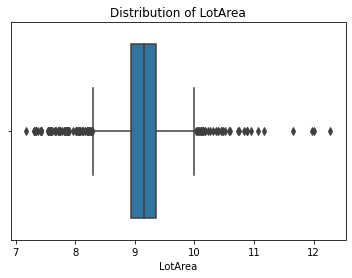

In [51]:
house['LotArea'] = np.log(house['LotArea'])
sns.boxplot(x=house['LotArea'])
plt.title('Distribution of LotArea')
plt.show()

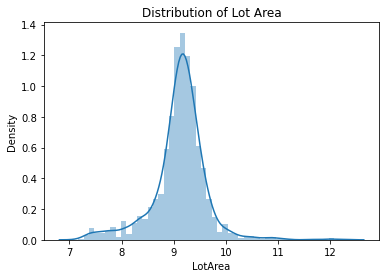

In [53]:
# Distribution for the LotArea
sns.distplot(house.LotArea)
plt.title('Distribution of Lot Area')
plt.show()

In [55]:
# Distribution of Lot Frontage. Lot Frontage too has outliers and log transforming.
house['LotFrontage']= np.log(house['LotFrontage'])

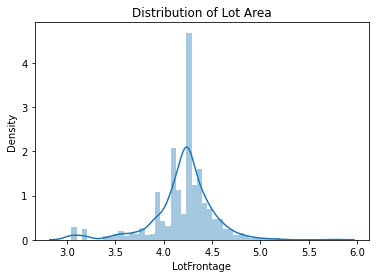

In [56]:
sns.distplot(house.LotFrontage)
plt.title('Distribution of Lot Area')
plt.show()

In [ ]:
# Checking the relationship between the LotArea and SalesPrice

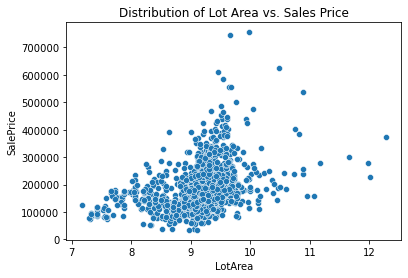

In [58]:
sns.scatterplot(x=house.LotArea,y=house.SalePrice)
plt.title('Distribution of Lot Area vs. Sales Price')
plt.show()
# No pattern visible as such

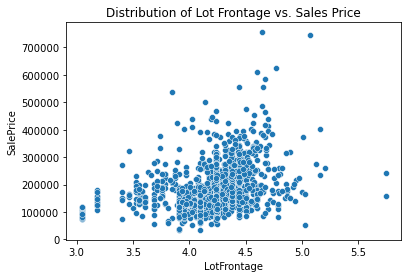

In [59]:
sns.scatterplot(x=house.LotFrontage,y=house.SalePrice)
plt.title('Distribution of Lot Frontage vs. Sales Price')
plt.show()
# No pattern visible as such

In [62]:
# Distribution of Total Basement Area , we can't log tranform This as this column contains 0 values. log0 is undefined.
maxTotalBsmtSF=list(house['TotalBsmtSF'].quantile([0.99]))
house['TotalBsmtSF']=house['TotalBsmtSF'].apply(lambda x: maxTotalBsmtSF[0] if x>maxTotalBsmtSF[0] else x)

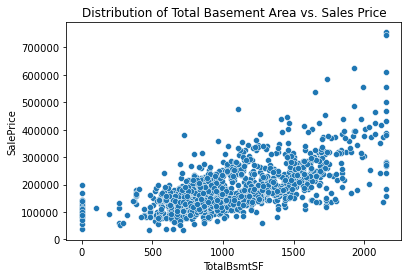

In [64]:
sns.scatterplot(x=house.TotalBsmtSF,y=house.SalePrice)
plt.title('Distribution of Total Basement Area vs. Sales Price')
plt.show()
# The relationship seems to be linear

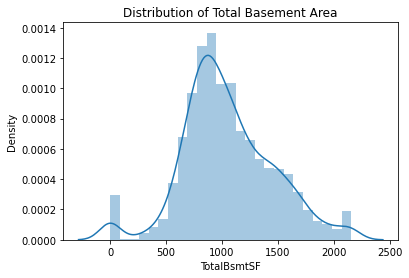

In [66]:
# Distplot for Total Basement Area
sns.distplot(house.TotalBsmtSF)
plt.title('Distribution of Total Basement Area')
plt.show()

In [67]:
house['1stFlrSF']= np.log(house['1stFlrSF'])

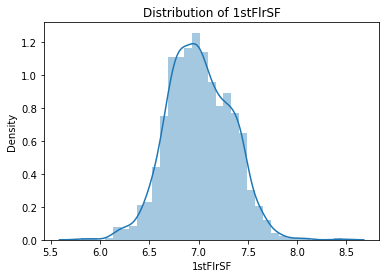

In [69]:
# Distplot for 1stFlrSF
sns.distplot(house['1stFlrSF'])
plt.title('Distribution of 1stFlrSF')
plt.show()

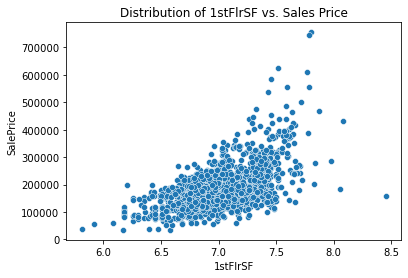

In [70]:
# The scatter plot between 1stFlrSF and SalesPrice
sns.scatterplot(x=house['1stFlrSF'],y=house.SalePrice)
plt.title('Distribution of 1stFlrSF vs. Sales Price')
plt.show()

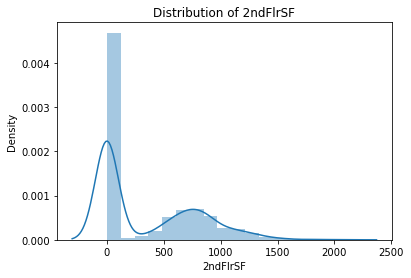

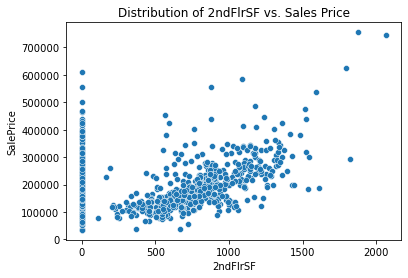

In [71]:
#Creating DistPlot of 2nd Floor Area
sns.distplot(house['2ndFlrSF'])
plt.title('Distribution of 2ndFlrSF')
plt.show()

# Checking Relationship between 2nd Floor Area and Sales Price
sns.scatterplot(x=house['2ndFlrSF'],y=house.SalePrice)
plt.title('Distribution of 2ndFlrSF vs. Sales Price')
plt.show()

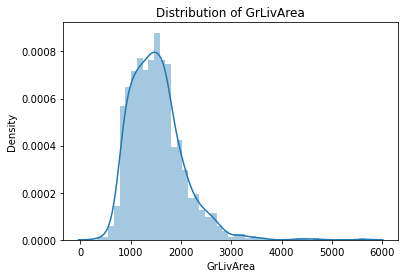

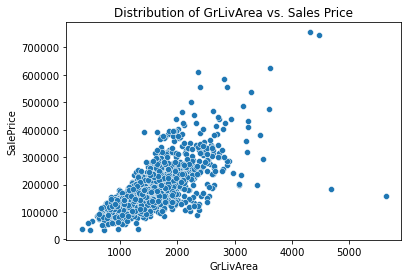

In [72]:
# Analysing Ground living Area column. This column has outliers and hence log transforming.
#Creating DistPlot of Ground living Area 
sns.distplot(house['GrLivArea'])
plt.title('Distribution of GrLivArea')
plt.show()

# Checking Relationship between Ground living Area and Sales Price
sns.scatterplot(x=house['GrLivArea'],y=house.SalePrice)
plt.title('Distribution of GrLivArea vs. Sales Price')
plt.show()

In [74]:
# Analysisng numeric columns
house.describe(percentiles=[0,0.1,0.2,0.4,0.5,0.75,0.9,0.99,1])

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,4.198687,9.110838,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1050.610788,7.007501,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,0.320396,0.517448,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,404.387881,0.317730,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,3.044522,7.170120,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.811141,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
0%,3.044522,7.170120,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.811141,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
10%,3.891820,8.517193,1924.900000,1950.000000,0.000000,0.000000,0.000000,74.900000,636.900000,6.629231,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2006.000000,106475.000000
20%,4.077537,8.864803,1947.800000,1961.800000,0.000000,0.000000,0.000000,172.000000,755.800000,6.742881,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2006.000000,124000.000000
40%,4.219508,9.081757,1965.000000,1980.000000,0.000000,218.600000,0.000000,374.600000,910.000000,6.907955,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2007.000000,147000.000000
50%,4.234107,9.156781,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,6.991176,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,4.369448,9.358890,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,7.237958,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000


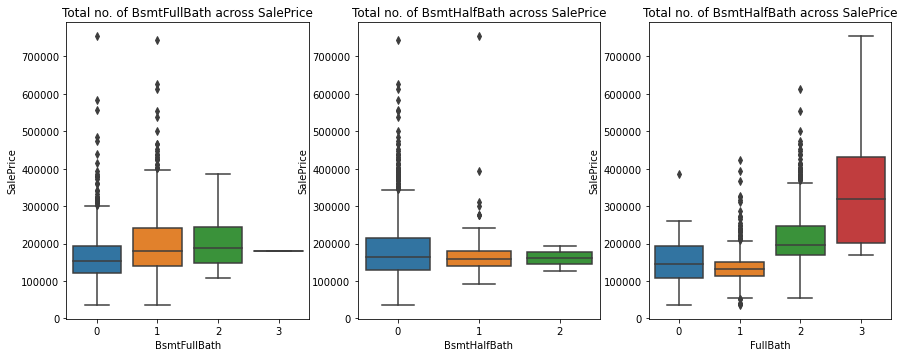

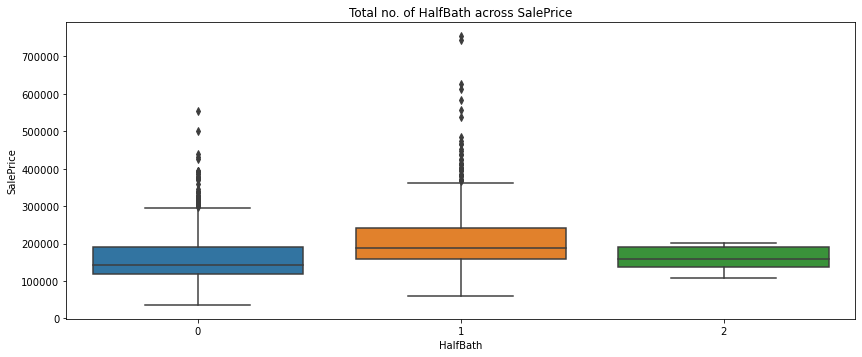

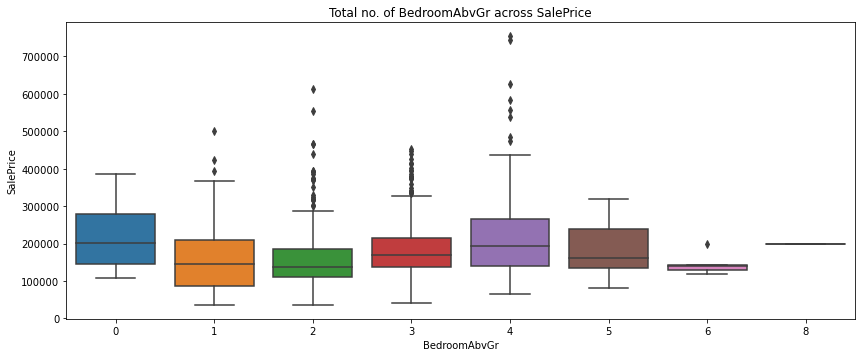

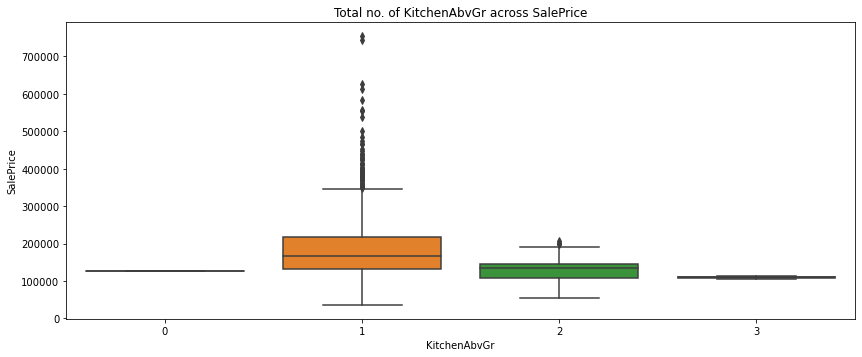

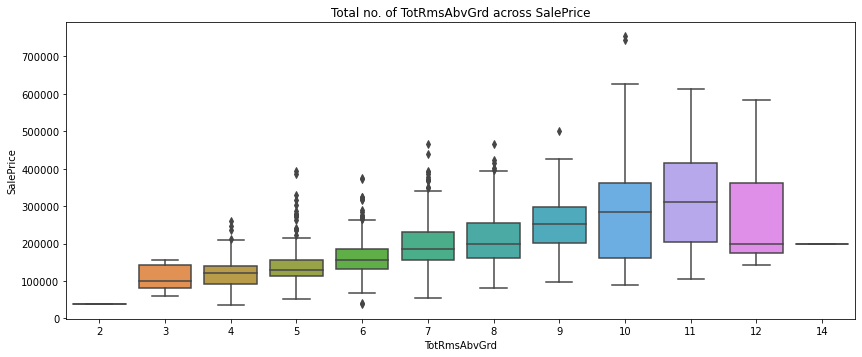

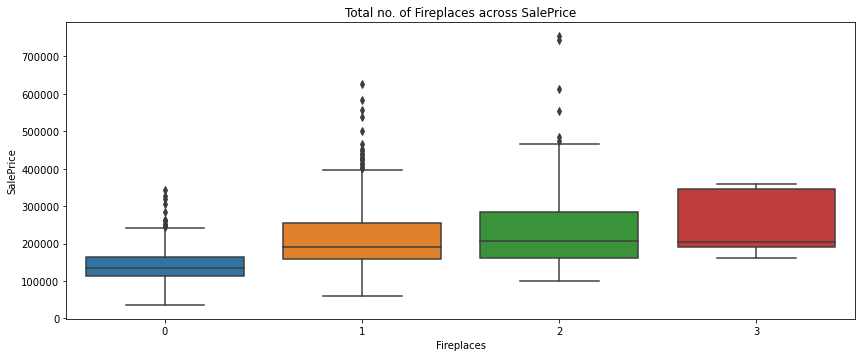

In [75]:
# Analysing other variables creating Boxplots

plt.figure(figsize=(20,12))
plt.subplot(2,4,1)
sns.boxplot(x='BsmtFullBath',y='SalePrice',data=house)
plt.title('Total no. of BsmtFullBath across SalePrice')

plt.subplot(2,4,2)
sns.boxplot(x='BsmtHalfBath',y='SalePrice',data=house)
plt.title('Total no. of BsmtHalfBath across SalePrice')

plt.subplot(2,4,3)
sns.boxplot(x='FullBath',y='SalePrice',data=house)
plt.title('Total no. of BsmtHalfBath across SalePrice')

plt.figure(figsize=(65,12))
plt.subplot(2,4,4)
sns.boxplot(x='HalfBath',y='SalePrice',data=house)
plt.title('Total no. of HalfBath across SalePrice')
plt.show()

plt.figure(figsize=(65,12))
plt.subplot(2,4,5)
sns.boxplot(x='BedroomAbvGr',y='SalePrice',data=house)
plt.title('Total no. of BedroomAbvGr across SalePrice')
plt.show()

plt.figure(figsize=(65,12))
plt.subplot(2,4,6)
sns.boxplot(x='KitchenAbvGr',y='SalePrice',data=house)
plt.title('Total no. of KitchenAbvGr across SalePrice')
plt.show()

plt.figure(figsize=(65,12))
plt.subplot(2,4,7)
sns.boxplot(x='TotRmsAbvGrd',y='SalePrice',data=house)
plt.title('Total no. of TotRmsAbvGrd across SalePrice')
plt.show()

plt.figure(figsize=(65,12))
plt.subplot(2,4,8)
sns.boxplot(x='Fireplaces',y='SalePrice',data=house)
plt.title('Total no. of Fireplaces across SalePrice')
plt.show()

Text(0.5, 1.0, 'MiscFeature across SalePrice')

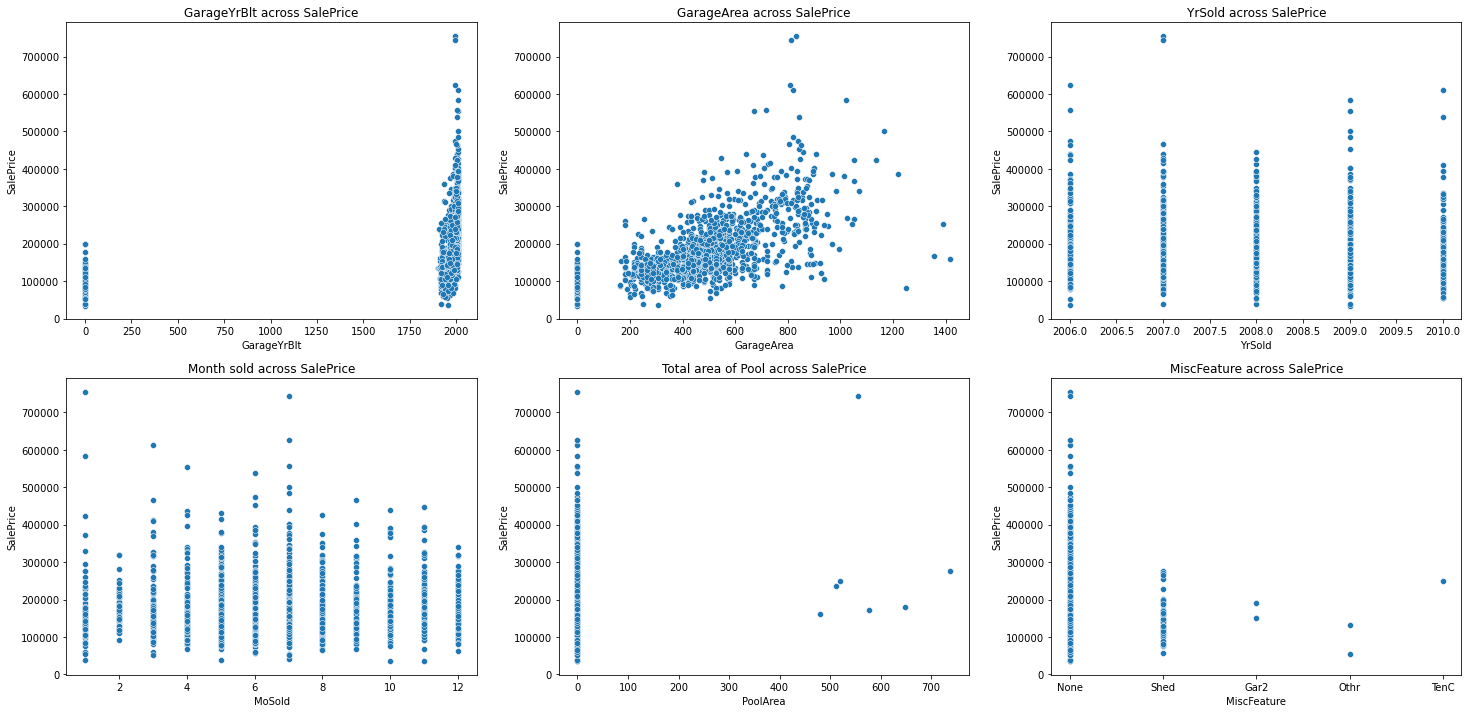

In [76]:
#Visualizing other variables 
plt.figure(figsize=(25,12))
plt.subplot(2,3,1)
sns.scatterplot(x='GarageYrBlt',y='SalePrice',data=house)
plt.title('GarageYrBlt across SalePrice')

plt.subplot(2,3,2)
sns.scatterplot(x='GarageArea',y='SalePrice',data=house)
plt.title('GarageArea across SalePrice')

plt.subplot(2,3,3)
sns.scatterplot(x='YrSold',y='SalePrice',data=house)
plt.title('YrSold across SalePrice')

plt.subplot(2,3,4)
sns.scatterplot(x='MoSold',y='SalePrice',data=house)
plt.title('Month sold across SalePrice')

plt.subplot(2,3,5)
sns.scatterplot(x='PoolArea',y='SalePrice',data=house)
plt.title('Total area of Pool across SalePrice')

plt.subplot(2,3,6)
sns.scatterplot(x='MiscFeature',y='SalePrice',data=house)
plt.title('MiscFeature across SalePrice')

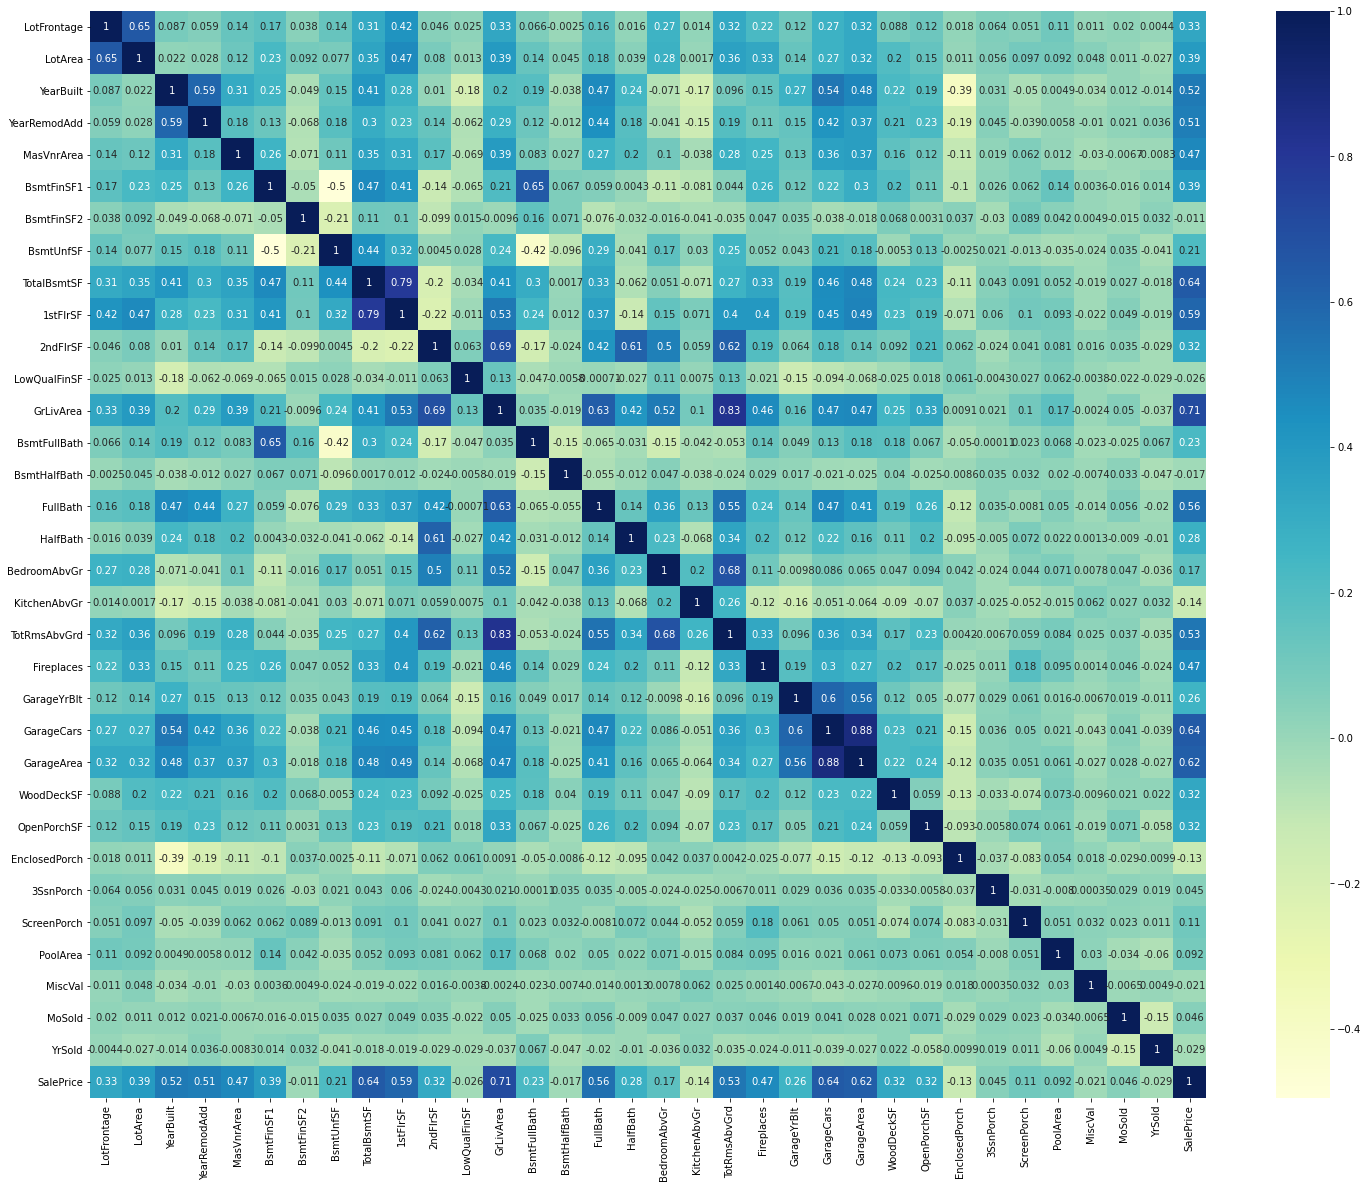

In [77]:
# Finding the correlation between the variables
plt.figure(figsize=(25,20))
sns.heatmap(house.corr(),annot= True,cmap='YlGnBu')
plt.show()

In [131]:
## Garage Cars is highly corelated to Garage Cars
##Total Basement Area is highly corelated to First floor Area
##Ground Living Area is highly corelated to Total Rooms above Ground

In [78]:
# Dropping the all these 3 variables
house.drop(['GarageArea','1stFlrSF','TotRmsAbvGrd'],axis=1,inplace=True)

In [79]:
# creating two dataframes with numeric and categorical columns
house_num=house.select_dtypes(np.number)
house_obj=house.select_dtypes(np.object)

In [80]:
# Creating the dummies for Categorical variables
house_dummies=pd.get_dummies(house_obj,drop_first=True)
house_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD- 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [81]:
# Dropping Categorical variable from Main Dataframe

In [82]:
house.drop(list(house_obj.columns), axis=1, inplace=True)

In [83]:
house = pd.concat([house,house_dummies], axis=1)

In [84]:
import datetime
now = datetime.datetime.now()
house['house_Age'] = now.year - house['YearBuilt']
house['Remod_Age']= now.year - house['YearRemodAdd']
house['Sold_Age']= now.year - house['YrSold']

house.drop(columns=['YearBuilt','YearRemodAdd','YrSold'],axis=1, inplace=True)
house.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,LowQualFinSF,GrLivArea,...,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,house_Age,Remod_Age,Sold_Age
0,4.174387,9.041922,196.0,706,0,150,856.0,854,0,1710,...,0,1,0,0,0,1,0,18,18,13
1,4.382027,9.169518,0.0,978,0,284,1262.0,0,0,1262,...,0,1,0,0,0,1,0,45,45,14
2,4.219508,9.328123,162.0,486,0,434,920.0,866,0,1786,...,0,1,0,0,0,1,0,20,19,13
3,4.094345,9.164296,0.0,216,0,540,756.0,756,0,1717,...,0,1,0,0,0,0,0,106,51,15
4,4.430817,9.565214,350.0,655,0,490,1145.0,1053,0,2198,...,0,1,0,0,0,1,0,21,21,13


In [85]:
y=house.pop('SalePrice') ## response variable in y 
X=house    # dataset with no dependent variable 

In [86]:
from sklearn.preprocessing import scale

In [ ]:
# Storing the column names since those get lost after scaling
# Creating the dataframe as sacling converts into numpy array

In [87]:
cols = X.columns

In [88]:
cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       ...
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'house_Age', 'Remod_Age', 'Sold_Age'],
      dtype='object', length=284)

In [90]:
X = pd.DataFrame(scale(X))

In [91]:
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       ...
       'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'house_Age', 'Remod_Age', 'Sold_Age'],
      dtype='object', length=284)

In [92]:
# split into train and test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

### Linear Regression

In [93]:
# Instantiate an object
lm = LinearRegression()

In [94]:
#fiitng the data
lm.fit(X_train, y_train)

LinearRegression()

In [95]:
# Printing the slope and coefficients
print(lm.intercept_)
print(lm.coef_)

42675638231388.664
[ 1.24663609e+03  8.08617621e+03  3.65806657e+03  3.90940609e+04
  1.35205613e+04  3.07591253e+04 -1.85756985e+04  8.79996576e+03
 -1.48692025e+03  2.75790183e+04  1.47396853e+03 -9.83649389e+01
  8.78904453e+02 -1.69292926e+03 -2.13746610e+03 -3.67980328e+03
  4.75800247e+02  7.15546414e+03  4.53499189e+03  6.24350307e+02
  1.70352076e+03  7.86775881e+02  1.07385005e+03  1.01449844e+03
  1.95930911e+05  2.09104912e+03 -7.50919915e+02  4.51456367e+02
  1.92281193e+03  3.43484758e+03  2.96642360e+03 -1.53784119e+02
 -4.41741605e+15  8.20330825e+02  1.63855981e+03  3.40662555e+03
  2.74417384e+03  1.24389930e+15  1.46678969e+03 -1.39376976e+02
  9.43233002e+02  6.37090791e+03  3.63495164e+03  1.25497236e+04
  1.02346304e+04  1.00635411e+03  4.61740115e+02  5.30322638e+02
  2.56896546e+02  9.81557405e+02  7.33874606e+02 -8.23626550e+02
 -1.09515513e+03  5.50452076e+02 -6.46581952e+02  1.86878395e+03
 -1.48855423e+03  2.18357624e+02 -2.55379184e+02  7.57256350e+02
  2.28

In [96]:
#importing necessary libraries
from sklearn.metrics import r2_score, mean_squared_error

In [97]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

In [98]:
# Calculating the Matrix
metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print("r2_train_lr: ",r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print("r2_test_lr: ",r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS_train_lr: ",rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS_test_lr: ",rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("MSE_train_lr: ",mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("MSE_test_lr: ",mse_test_lr)
metric.append(mse_test_lr**0.5)

r2_train_lr:  0.9586696704654185
r2_test_lr:  -1.1712516538623045e+21
RSS_train_lr:  263716384043.29584
RSS_test_lr:  3.3014217129352134e+33
MSE_train_lr:  258292246.85925156
MSE_test_lr:  7.537492495285875e+30


### Ridge Regression

In [99]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [100]:
# checking the best value of alpha
print(model_cv.best_params_)

{'alpha': 100}


In [101]:
# Fitting the model as per 
alpha = 100
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.52123906e+03  5.22347183e+03  3.06982372e+03  5.27865202e+03
  1.35911019e+03  6.50786755e+02  1.12808177e+04  7.62507295e+03
 -1.77168137e+03  1.64951836e+04  2.15165180e+03 -2.72092582e+02
  4.16304884e+03  1.09253051e+03 -4.23240195e+02 -2.48609159e+03
  2.63575930e+03  1.05707645e+02  5.25506682e+03  1.03431824e+03
  1.49078373e+03 -8.60709278e+01  1.18475104e+03  1.22361755e+03
  2.53666468e+03  9.78053115e+01 -5.70495172e+02  1.20846266e+02
 -9.17902105e+01  1.24741567e+03 -5.82765678e+02 -4.49320724e+01
 -1.01270641e+03 -8.47824306e+02  4.60155240e+02  3.72996021e+02
 -7.59294013e+02 -9.33414516e+02  9.71557074e+01 -3.52123510e+02
 -5.48976526e+02  8.06911639e+02  8.15628329e+02  1.77821854e+03
  9.93351497e+02  6.97206391e+02  1.88608975e+02  5.93358690e+02
  2.30714852e+02 -6.79587058e+01  9.39926165e+01  4.65740259e+02
 -7.75519053e+01  1.45899960e+03 -6.73561186e+02  1.89192935e+03
 -1.71720254e+03 -2.74298762e+02 -4.48939440e+02  7.04271744e+02
  5.95956178e+02  1.90789

In [102]:
# Creating the Matrix
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9451014571661649
0.750111935057719
350291066352.89197
704362619837.8019
343086254.99793535
1608133835.246123


### Lasso Regression

In [103]:
#Instantiating the Lasso object
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [104]:
# Getting the best alpha
print(model_cv.best_params_)

{'alpha': 1000}


In [105]:
# Fitting the model as per best alpha
alpha =1000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1000)

In [106]:
#Creating the Matrix
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9349718399878721
0.6184497000173814
414925102521.58704
1075480611519.9302
406390893.7527787
2455435186.118562


In [134]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.586697e-01,9.451015e-01,9.349718e-01
1,R2 Score (Test),-1.171252e+21,7.501119e-01,6.184497e-01
2,RSS (Train),2.637164e+11,3.502911e+11,4.149251e+11
3,RSS (Test),3.301422e+33,7.043626e+11,1.075481e+12
4,MSE (Train),1.607147e+04,1.852259e+04,2.015914e+04
5,MSE (Test),2.745449e+15,4.010154e+04,4.955235e+04


### Changes in Coefficient after Regularization

In [107]:

b = pd.DataFrame(index=X.columns)
b.rows = X.columns

b['Linear'] = lm.coef_
b['Ridge'] = ridge.coef_
b['Lasso'] = lasso.coef_

In [108]:
pd.set_option('display.max_rows', None)
b

,Linear,Ridge,Lasso
LotFrontage,1.246636e+03,1.521239e+03,219.052403
LotArea,8.086176e+03,5.223472e+03,5962.119890
MasVnrArea,3.658067e+03,3.069824e+03,1391.094698
BsmtFinSF1,3.909406e+04,5.278652e+03,6372.714946
BsmtFinSF2,1.352056e+04,1.359110e+03,0.000000
BsmtUnfSF,3.075913e+04,6.507868e+02,-0.000000
TotalBsmtSF,-1.857570e+04,1.128082e+04,8242.783688
2ndFlrSF,8.799966e+03,7.625073e+03,0.000000
LowQualFinSF,-1.486920e+03,-1.771681e+03,-1989.106671
GrLivArea,2.757902e+04,1.649518e+04,31502.432848


In [109]:
b.sort_values(by=['Ridge'], ascending=False)

,Linear,Ridge,Lasso
GrLivArea,2.757902e+04,1.649518e+04,31502.432848
TotalBsmtSF,-1.857570e+04,1.128082e+04,8242.783688
OverallQual_Very Excellent,9.884924e+03,1.083716e+04,13883.237995
OverallQual_Excellent,9.779989e+03,9.094474e+03,12050.746298
2ndFlrSF,8.799966e+03,7.625073e+03,0.000000
OverallQual_Very Good,8.444018e+03,6.972468e+03,8948.955803
RoofMatl_WdShngl,5.696132e+14,5.371149e+03,2936.471661
BsmtFinSF1,3.909406e+04,5.278652e+03,6372.714946
GarageCars,4.534992e+03,5.255067e+03,4190.804684
LotArea,8.086176e+03,5.223472e+03,5962.119890


In [110]:
b[b.Lasso == 0]

,Linear,Ridge,Lasso
BsmtFinSF2,1.352056e+04,1.359110e+03,0.0
BsmtUnfSF,3.075913e+04,6.507868e+02,-0.0
2ndFlrSF,8.799966e+03,7.625073e+03,0.0
BsmtHalfBath,-9.836494e+01,-2.720926e+02,0.0
HalfBath,-1.692929e+03,1.092531e+03,0.0
GarageYrBlt,7.155464e+03,1.057076e+02,0.0
WoodDeckSF,6.243503e+02,1.034318e+03,0.0
OpenPorchSF,1.703521e+03,1.490784e+03,0.0
EnclosedPorch,7.867759e+02,-8.607093e+01,0.0
MiscVal,2.091049e+03,9.780531e+01,0.0


In [111]:
b.sort_values(by=['Lasso'], ascending=False)

,Linear,Ridge,Lasso
GrLivArea,2.757902e+04,1.649518e+04,31502.432848
OverallQual_Very Excellent,9.884924e+03,1.083716e+04,13883.237995
OverallQual_Excellent,9.779989e+03,9.094474e+03,12050.746298
OverallQual_Very Good,8.444018e+03,6.972468e+03,8948.955803
TotalBsmtSF,-1.857570e+04,1.128082e+04,8242.783688
BsmtFinSF1,3.909406e+04,5.278652e+03,6372.714946
LotArea,8.086176e+03,5.223472e+03,5962.119890
SaleType_New,-2.492212e+15,2.771497e+03,5041.096920
GarageCars,4.534992e+03,5.255067e+03,4190.804684
Neighborhood_NoRidge,1.754263e+03,5.184235e+03,3631.651055


In [132]:
### Doubling the alpha for Ridge

In [112]:
alpha = 200
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.71268661e+03  4.72994092e+03  3.28432818e+03  4.47850751e+03
  1.08832596e+03  8.96661470e+02  1.02928017e+04  6.38473232e+03
 -1.27085427e+03  1.33213038e+04  2.31507593e+03 -1.22946748e+02
  4.65117699e+03  1.66022631e+03  3.10744215e+02 -1.97884338e+03
  2.92418010e+03  9.80514191e+01  5.31082056e+03  1.33609719e+03
  1.43790997e+03 -8.63218351e+01  1.19778189e+03  1.22280130e+03
  1.76153622e+03  7.98392560e+01 -4.77819806e+02  2.72943596e+02
 -4.70672847e+02  1.17577922e+03 -8.58755133e+02  6.91125042e+01
 -9.92179321e+02 -3.46736591e+02  6.60211210e+02  4.16991244e+02
 -9.21047372e+02 -8.68256117e+02 -2.27735267e+01 -2.67639100e+02
 -5.66829699e+02  7.13980235e+02  6.26615765e+02  1.22123911e+03
  1.41198846e+02  6.65681037e+02  2.68499328e+02  5.14269618e+02
  2.88252050e+02 -4.86594766e+02 -6.09635423e+01  6.97650579e+02
  1.72363275e+02  1.48752156e+03 -7.57761115e+02  1.99121731e+03
 -1.63786394e+03 -3.30309866e+02 -4.45106496e+02  6.95100573e+02
  5.80910228e+02  8.03358

In [113]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric4 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric4.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric4.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric4.append(mse_test_lr**0.5)

0.9350281144782511
0.7967908463787321
414566031948.3849
572788187594.1509
406039208.5684475
1307735588.1144998


### Fitting Lasso model for alpha = 2000

In [114]:


alpha =2000

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=2000)

In [115]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric5 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric5.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric5.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric5.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric5.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric5.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric5.append(mse_test_lr**0.5)

0.9165982923256217
0.6800807348994531
532161176032.2429
901760441239.3772
521215647.4360851
2058813792.7839663


In [135]:

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
drg_metric = pd.Series(metric4, name = 'Double Ridge Regression')
dls_metric = pd.Series(metric5, name = 'Double Lasso Regression')

dfinal_metric = pd.concat([lr_metric, rg_metric, ls_metric, drg_metric, dls_metric], axis = 1)

dfinal_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression,Double Ridge Regression,Double Lasso Regression
0,R2 Score (Train),9.586697e-01,9.451015e-01,9.349718e-01,9.350281e-01,9.165983e-01
1,R2 Score (Test),-1.171252e+21,7.501119e-01,6.184497e-01,7.967908e-01,6.800807e-01
2,RSS (Train),2.637164e+11,3.502911e+11,4.149251e+11,4.145660e+11,5.321612e+11
3,RSS (Test),3.301422e+33,7.043626e+11,1.075481e+12,5.727882e+11,9.017604e+11
4,MSE (Train),1.607147e+04,1.852259e+04,2.015914e+04,2.015041e+04,2.283015e+04
5,MSE (Test),2.745449e+15,4.010154e+04,4.955235e+04,3.616263e+04,4.537415e+04


In [116]:
b = pd.DataFrame(index=X.columns)
b.rows = X.columns

b['Ridge'] = ridge.coef_
b['Lasso'] = lasso.coef_

In [117]:
pd.set_option('display.max_rows', None)
b

,Ridge,Lasso
LotFrontage,1.712687e+03,0.000000
LotArea,4.729941e+03,5071.744073
MasVnrArea,3.284328e+03,1117.080274
BsmtFinSF1,4.478508e+03,5501.660363
BsmtFinSF2,1.088326e+03,0.000000
BsmtUnfSF,8.966615e+02,-0.000000
TotalBsmtSF,1.029280e+04,8805.109412
2ndFlrSF,6.384732e+03,0.000000
LowQualFinSF,-1.270854e+03,-1202.197710
GrLivArea,1.332130e+04,29508.516206


In [118]:
b.sort_values(by=['Ridge'], ascending=False)

,Ridge,Lasso
GrLivArea,1.332130e+04,29508.516206
TotalBsmtSF,1.029280e+04,8805.109412
OverallQual_Very Excellent,9.869007e+03,13030.780868
OverallQual_Excellent,8.419457e+03,11621.643937
2ndFlrSF,6.384732e+03,0.000000
OverallQual_Very Good,6.097645e+03,8048.268304
Neighborhood_NoRidge,5.584673e+03,3575.496361
GarageCars,5.310821e+03,5401.764449
RoofMatl_WdShngl,5.041279e+03,2391.469342
LotArea,4.729941e+03,5071.744073


In [119]:
b.sort_values(by=['Lasso'], ascending=False)

,Ridge,Lasso
GrLivArea,1.332130e+04,29508.516206
OverallQual_Very Excellent,9.869007e+03,13030.780868
OverallQual_Excellent,8.419457e+03,11621.643937
TotalBsmtSF,1.029280e+04,8805.109412
OverallQual_Very Good,6.097645e+03,8048.268304
BsmtFinSF1,4.478508e+03,5501.660363
GarageCars,5.310821e+03,5401.764449
LotArea,4.729941e+03,5071.744073
SaleType_New,2.363275e+03,4466.323253
Neighborhood_NoRidge,5.584673e+03,3575.496361


### Dropping the top5 Predictors and creating the Lasso Regression 

In [120]:
#Dropping top 5 predictors
X_train.drop(columns=['GrLivArea','OverallQual_Very Excellent','OverallQual_Excellent','OverallQual_Very Good','TotalBsmtSF'],axis=1, inplace=True)

In [121]:
#Dropping top 5 predictors
X_test.drop(columns=['GrLivArea','OverallQual_Very Excellent','OverallQual_Excellent','OverallQual_Very Good','TotalBsmtSF'],axis=1, inplace=True)

In [122]:
lasso = Lasso()

# cross validation
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv1.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [123]:
# Printing the best hyperparameter alpha
print(model_cv1.best_params_)

{'alpha': 500}


In [126]:
#Fitting Lasso model for alpha = 500 and printing coefficients which have been penalised

alpha =500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=500)

In [127]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric6 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric6.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric6.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric6.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric6.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric6.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric6.append(mse_test_lr**0.5)

0.928049136443061
0.5869064696432711
459096788719.09924
1164391910223.1619
449654053.59363294
2658429018.774342


In [128]:
b = pd.DataFrame(index=X_train.columns)
b.rows = X_train.columns

b['Lasso'] = lasso.coef_

In [129]:
b.sort_values(by=['Lasso'], ascending=False)

,Lasso
BsmtFinSF1,31800.823767
BsmtUnfSF,24413.062272
2ndFlrSF,23428.785081
BsmtFinSF2,8641.916722
LotArea,8126.472387
Neighborhood_NoRidge,7021.235643
GarageCars,6318.297359
BsmtExposure_Gd,5291.347277
PoolArea,5003.099209
FullBath,4933.940220
